# Description
This notebook develops a classifier for variable stars detected with ZTF. The data is downloded from following url http://variables.cn:88/ztf/ 
The data is contains 23 features processed from the ZTF light curves and corresponding variable type label. The data contains 781,602 labled periodic variables. 
The notebook demonstrates the use of a simple random forest classifer for the Labeled data set

## Import modules

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import Labeled Data set

In [2]:
widths = (8,7,4,13,43)
header_pd = pd.read_fwf('Labeled_data.txt', widths = widths,skiprows=7, nrows=27)
labeled_data = pd.read_csv('Labeled_data.txt', header=None, delim_whitespace=True, skiprows=37) # extract data
labeled_data.columns = header_pd.iloc[:,3]

In [3]:
label = labeled_data.Type.unique()

## Variable Type Distribution in the data

<AxesSubplot:xlabel='Type', ylabel='Count'>

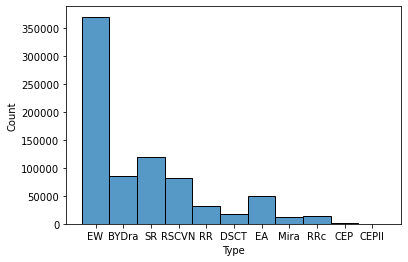

In [4]:
import seaborn as sns
sns.histplot(data=labeled_data, x=labeled_data.Type)

# Train a Classifier

## Split into training and test data

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


# for X data
X = labeled_data

# Encode labels to form y labels
le = preprocessing.LabelEncoder()
le.fit(label)
y = le.transform(labeled_data.Type)

# Split dataset into training set and test set
X_tr, X_ts, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
X_train = X_tr.drop(['ID','SourceID', 'RAdeg','DEdeg', 'Type'],axis='columns')
X_test = X_ts.drop(['ID','SourceID', 'RAdeg','DEdeg', 'Type'],axis='columns')

## Distribution of variable star types in the training data

<AxesSubplot:xlabel='Type', ylabel='Count'>

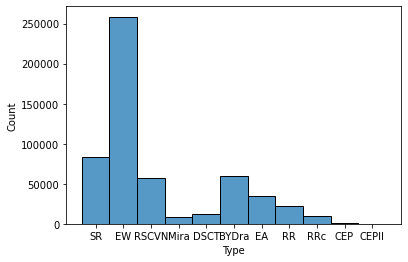

In [6]:
sns.histplot(data=labeled_data, x=X_tr.Type)

## Train a simple Random Forest estimator

In [7]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Predict test data output
y_pred=clf.predict(X_test)

# Estimate model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9368946737688768


## Prediction Error distribution accross variable type class

<AxesSubplot:xlabel='Test', ylabel='Count'>

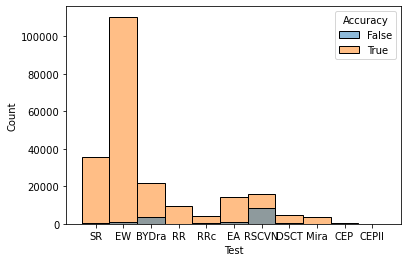

In [17]:
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Form a dataframe of test vs predicted labels
pd_prediction = pd.DataFrame()
pd_prediction['Test'] = y_test_labels
pd_prediction['Pred'] = y_pred_labels
pd_prediction['Accuracy'] = y_test_labels == y_pred_labels
pd_prediction.head()

sns.histplot(data=pd_prediction, x=pd_prediction.Test, hue = pd_prediction.Accuracy)

# sns.histplot(data=pred_err, x=pred_err.Test)


# Visualize Feature importance

In [9]:
# Feature Description
widths = (8,7,4,13,43)
header_pd = pd.read_fwf('Labeled_data.txt', widths = widths,skiprows=7, nrows=27)
header_pd.head(30)

,--------,-------,----,-------------,-------------------------------------------
0,1- 22,A22,---,ID,ZTF variables catalog identifier
1,24- 29,I6,---,SourceID,Internal source identifier
2,31- 39,F9.5,deg,RAdeg,Right Ascension in decimal degrees (J2000
3,41- 49,F9.5,deg,DEdeg,Declination in decimal degrees (J2000)
4,51- 61,F11.7,d,Per,Period
5,63- 68,F6.3,---,R21,Ratio of a_2_/a_1_
6,70- 74,F5.3,---,phi21,The {phi}_2_ - 2*{phi}_1_
7,76- 88,F13.7,d,T0,"HJD of Minimum, HJD-2,400,000"
8,90- 95,F6.3,mag,gmag,Mean ZTF g band magnitude
9,97-102,F6.3,mag,rmag,Mean ZTF r band magnitude


In [10]:
# feature importance
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

-------------
Dmin_r        0.157117
Per           0.148948
Per_r         0.113331
Dmin_g        0.102836
Per_g         0.060956
Amp_r         0.057229
R21           0.056619
R21_r         0.055763
Amp_g         0.037460
R2_g          0.024487
R21_g         0.024384
phi21_r       0.024350
phi21         0.023008
R2_r          0.022221
phi21_g       0.015652
rmag          0.013365
gmag          0.012462
Num_g         0.011878
log(FAP_g)    0.011194
log(FAP_r)    0.010653
Num_r         0.008869
T0            0.007218
dtype: float64

No handles with labels found to put in legend.


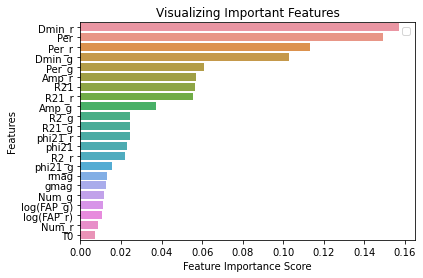

In [11]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Plot location of test data

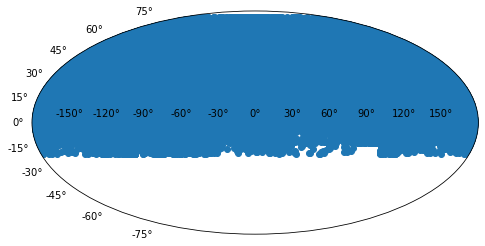

In [12]:
import astropy.coordinates as coord
import astropy.units as u

ra = coord.Angle(X_ts.RAdeg, unit=u.degree)

ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(X_ts.DEdeg, unit=u.degree)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)